Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez Almoyna"
PRENOM = "Maud"
GROUPE = "3"
DATE = "13/02/2019"

---

# TP 4 : Fonctions, graphiques et discrétisation


## Exemple de programme plus complexe

Jusqu'ici les fonctions ont été utilisées une par une, mais elles prennent toute leur utilité lorsque les blocs d'instructions qu'elles contiennent sont amenés à être utilisés plusieurs fois dans un programme ou encore appelés par d'autres fonctions. Une des règles d'or de la programmation est que lorsqu'un bloc d'instruction apparaît deux fois dans un programme, c'est qu'il mérite d'être mis dans une fonction ! Ainsi lors du débuggage du programme ou lors de son évolution, il n'est nécessaire de ne modifier le bloc qu'une fois (dans la fonction) et non dans ces multiples écritures le long du programme.


Dans le programme suivant, l'objectif est de montrer numériquement l'égalité suivante :
$$\sum_{k=0}^{n} \binom{n}{k} x^k = (1+x)^n$$

Il va falloir calculer de nombreuses factorielles, ainsi que des coefficients binomiaux, calculer une somme et tester son égalité. Un bon réflexe à avoir est donc d'identifier tous les sous-blocs d'instructions à mettre sous forme de fonction avant d'écrire le programme. 


```python
# fichier somme.py
###################################
#  Programme Python type : somme.py
###################################

###################################
# Importation des fonctions externes

from math import pow

###################################
# Definition locale des fonctions

def factorielle(n):
    """ Calcule la factorielle de n """   # ces commentaires decrivent fonction et arguments
    f = 1
    for i in range(1,n+1):
        f = f * i
    return f

def k_parmi_n(k,n):
    """ Calcule le coefficient binomiaux k parmi n """
    c = factorielle(n)/( factorielle(k)*factorielle(n-k) )  # fonction factorielle appelee ici
    return c

def somme(x,n,verbose=False):
    """ Calcule la somme des k parmi n fois x exposant k """
    s = 0
    for k in range(n+1):
        s = s + k_parmi_n(k,n) * pow(x,k)    # appelle k_parmi_n qui appelle factorielle
        if verbose : print 'k =',k,': s =',s
    if verbose : 
        print 'La somme pour n =',n,' et x =',x,'vaut',s
    return s

def test_somme(x,n,verbose=False):
    """ Teste l'egalite de l'enonce """
    test = False
    polynom = pow((1+x),n)
    s = somme(x,n,verbose)
    if s == polynom :
        test = True
        if verbose : print 'Egalite OK'
    else :
        if verbose : print 'Egalite non verifiee'
    return test

###################################
# Corps principal du programme

if __name__ == "__main__":

    test_somme(x=1,n=5,verbose=True)

```

Le fichier somme.py peut être lu et exécuter de deux manières différentes. La première méthode consiste à exécuter le corps du programme situé sous le mot clé `__main__` (facultatif néanmoins) :

```python
> python somme.py
k = 0 : s = 1.0
k = 1 : s = 6.0
k = 2 : s = 16.0
k = 3 : s = 26.0
k = 4 : s = 31.0
k = 5 : s = 32.0
La somme pour n = 5  et x = 1 vaut 32.0
Egalite OK
```

La deuxième méthode consiste à importer les fonctions du fichier, ce qui permet de les tester une par une avec des variables différences :

```python
> python
>>> from somme import *
>>> factorielle(4)   # test pour n = 4
24
>>> factorielle(0)   # toujours tester la robustesse des fonctions aux cas particuliers
1
>>> somme(x=1,n=5,verbose=True)
k = 0 : s = 1
k = 1 : s = 6
k = 2 : s = 16
k = 3 : s = 26
k = 4 : s = 31
k = 5 : s = 32
La somme pour n = 5  et x = 1 vaut 32
32
>>> test_somme(x=1,n=5)  # verbose est par defaut False
True
>>> test_somme(x=1.2,n=5)  # 
False
```

Le dernier test ne fonctionne que pour les entiers, comparer l'égalité de deux réels est difficile numériquement ! Affaire à suivre...

 Pour se mettre en jambes

## Exercice 1: Volumes

1.  Définir une fonction cube qui calcule le volume d'un cube.
2.    Définir une fonction sphere qui calcule le volume d'une sphère en appelant la fonction cube.
3.    Définir une fonction à deux arguments qui calcule le volume d'un cône, puis d'une pyramide.
4.    Écrire une fonction volume qui prend pour argument une longueur, une chaîne de caractères qui peut valoir "cube", "sphere", "cone" ou "pyramide" et qui appelle la fonction souhaitée. Astuce : il faudra définir un deuxième argument de longueur optionnel.

In [6]:
def Vcube(c) :
    return c**3

def Vsphère(r) :
    return Vcube(r)*4/3*3.14

def Vcone(r, h) :
    return (3.14*r**2*h)/3

def Vpyramide(c, h) :
    return (c**2*h)/3

def Volume(nom, c, h = 1) :
    if nom == 'cube' :
        return Vcube(c)
    if nom == 'sphere' :
        return Vsphere(c)
    if nom == 'cone' :
        return Vcone(c, h)
    if nom == 'pyramide' : 
        return Vpyramide(c, h)


## Exercice 2: Tracé de fonctions mathématiques

Définir et tracer les fonctions mathématiques suivantes pour $x\in [-5,5]$ et $a=1,0.5,0.1,0.01$:
1. $f(x)=\frac{1}{1-x}$ pour $x\in [-5,5]$
2. $ f(x) = \left\lbrace \begin{array}{ll} 
 e^{\sqrt{1-ax^2}}, & \vert x\vert  < \sqrt{1/a} \\
 0, & \vert x\vert > \sqrt{1/a} 
 \end{array}\right.$ avec un paramètre $a$ de la fonction par défaut égal à 1.

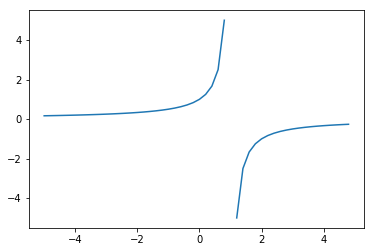

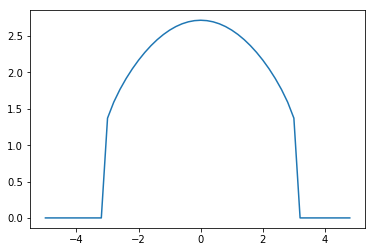

In [25]:
from matplotlib import pyplot

def F1(x) :
    if x != 1 :
        return 1/(1-x)
    
def F2(x, a=1) :
    if abs(x) > (1/a)**.5 :
        return 0
    if abs(x) < (1/a)**.5 :
        return 2.718**((1-a*x**2)**.5)
    
a = 0.1

xmin =  -5.0
xmax = 5.0
npoints = 50
step_size = (xmax -xmin)/ npoints
x_list= []
y_list = []
for i in range(npoints) :
    x = xmin + i * step_size
    x_list.append(x)
    y_list.append(F1(x))

fig = pyplot.figure()
pyplot.plot(x_list, y_list)
pyplot.show()

xmin =  -5.0
xmax = 5.0
npoints = 50
step_size = (xmax -xmin)/ npoints
x_list= []
y_list = []
for i in range(npoints) :
    x = xmin + i * step_size
    x_list.append(x)
    y_list.append(F2(x,a))

fig = pyplot.figure()
pyplot.plot(x_list, y_list)
pyplot.show()

## Exercice 3: ADN

L'ADN est formé de deux brins chacun constitué d'une alternance de quatre bases : A, T, C ou G. Les deux brins sont complémentaires : A est toujours associé avec T, C toujours avec G.

1.     Écrire une fonction qui prend pour argument une base sous forme de texte et renvoie son complémentaire.
2.    Demander à un utilisateur de rentrer au clavier une chaîne d'ADN quelconque. Tester si la chaîne rentrée par l'utilisateur est valide.
3.     Parcourir cette chaîne de caractères représentant un brin d'ADN et imprimer à l'écran le brin complémentaire. Tester le programme avec la chaîne 'ATGC'.
4.     Afficher à l'écran le pourcentage de bases A, T, G, C présents dans le brin.

In [40]:
def ADN(base):
    compl = ''
    for x in base :
        if x == 'A' :
            compl += 'T'
        if x == 'T' :
            compl += 'A'
        if x == 'C' :
            compl += 'G'
        if x == 'G' :
            compl += 'C'
    return compl


chain = input("Saisir une chaine d'ADN : ")
val=''
for x in chain :
    if x != 'A' and x != 'T' and x != 'C' and x != 'G' :
        val = 'invalide'
        break
if val == 'invalide' :
    print('chaine invalide')
else :
    print('chaine valide')


print(ADN(chain))

print("Pourcentage de A : ", chain.count('A')*100/len(chain))
print("Pourcentage de T : ", chain.count('T')*100/len(chain))
print("Pourcentage de C : ", chain.count('C')*100/len(chain))
print("Pourcentage de G : ", chain.count('G')*100/len(chain))

Saisir une chaine d'ADN : ACGT
chaine valide
TGCA
Pourcentage de A :  25.0
Pourcentage de T :  25.0
Pourcentage de C :  25.0
Pourcentage de G :  25.0


## Exercice 4: Dérivée d'une fonction

Mathématiquement, la dérivée d'une fonction $f(x)$ au point $x$ est définie par :

$$ f'(x) = \lim\limits_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{\epsilon} $$

Numériquement, comme la fonction est discrétisée en $\left\lbrace x_i\right\rbrace$ points, on peut essayer d'approcher cette définition du mieux possible en calculant le taux d'accroissement de la fonction entre deux points les plus proches possibles:

$$f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_{i}} $$

1. Définir et tracer la fonction $f(x)=e^{ax}$ avec 10 points pour $x\in[0,2]$ et $a=1,2$ (tracer une légende pour y voir plus clair)
2. Définir une fonction qui calcule la dérivée d'une fonction à partir de la donnée des deux listes d'abscisses et d'ordonnées des 10 points tracés précédemment. Cette fonction retourne une liste de points calculés comme étant le taux d'accroissement entre deux points adjacents.
3. Dans le même graphique, tracer les fonctions et leurs dérivées. Que constatez-vous pour $a=1$ ?
4. Pour tenter de remédier au problème, augmenter le nombre de points. Que constatez-vous ?
5. Une autre façon de résoudre le problème peut être de symétriser la formule du taux d'accroissement :
$ f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}} $
Coder cette façon d'exprimer la dérivée et commenter.

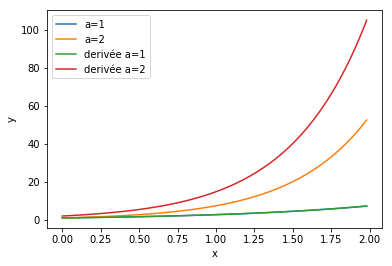

In [60]:
def F1(x, a) :
    return 2.718**(a*x)

def deriv(x, a) :
    der_list=[]
    for i in range(0, 100) :
        der_list.append((F1(x[i]+0.0001, a) -F1(x[i], a))/(x[i]+.0001 - x[i]))
    return der_list
        

xmin =  0.0
xmax = 2.0
npoints = 100
step_size = (xmax -xmin)/ npoints

x_list= []
y_list1= []
y_list2= []

for i in range(npoints) :
    x = xmin + i * step_size
    x_list.append(x)
    y_list1.append(F1(x, 1))
    y_list2.append(F1(x, 2))

fig = pyplot.figure()
pyplot.plot(x_list, y_list1, label='a='+str(1))
pyplot.plot(x_list, y_list2 ,label='a='+str(2))

pyplot.plot(x_list, deriv(x_list, 1), label='derivée a='+str(1))
pyplot.plot(x_list, deriv(x_list, 2) ,label='derivée a='+str(2))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.legend()
pyplot.show()




## Exercice 5: Factorielles et combinatoire

Vous souhaitez évaluer de manière numérique le nombre de façon de tirer $k$ objets parmi $n$, i.e. $\frac{n!}{k!(n-k)!}$. Pour cela, vous souhaitez tout d'abord créer une fonction factorielle.

1.     Définissez une fonction `fact(n)` qui évalue $n!$ à l'aide d'une boucle for. Testez cette fonction.
2.      Définissez une fonction récursive `fact_rec(n)` qui évalue $n!$ en s'appelant elle même. Testez cette fonction.
3.      Définissez une fonction `fact_list(n)` qui stocke $i!$ pour $i$ allant de 0 à $n$ à l'aide d'une boucle `for`. Testez cette fonction.
4.      Comparez le résultat de ces trois fonctions à celui obtenu à l'aide de `math.factorial(n)`. Pensez à importer la librairie math en début de programme: `import math`
5.      Définissez une fonction `k_parmi_n(n,k)`, exploitant la fonction `fact_list` que vous avez déjà construite. Comparez le résultat de votre fonction à celui obtenu à l'aide de `scipy.special.binom(n,k)` (n'oubliez pas d'importer la librairie).

In [71]:
import math
from scipy.special import binom 

def fact(n):
    f = 1
    for i in range(1,n+1):
        f = f * i
    return f

print(fact(3))

def fact_rec(n) :
    if n == 0 :
        return 1
    if n == 1 :
        return 1
    return n*fact_rec(n-1)

print(fact_rec(3))

def fact_list(n) :
    f = 1
    f_list = [1]
    for i in range(1,n+1):
        f = f * i
        f_list.append(f)
    return f_list

print(fact_list(3))

print(math.factorial(3))

def k_parmi_n(n, k):
    c = fact(n)/( fact(k)*fact(n-k) ) 
    return c

print(k_parmi_n(8,3))
print(scipy.special.binom(8, 3))

6
6
[1, 1, 2, 6]
6
56.0
56.0


## Exercice 6: Série entière de l'exponentielle

La fonction exponentielle peut s'écrire sous la forme d'une série entière :

${\rm e}^x=\sum_{n=0}^{+\infty}{\frac{x^n}{n!}}=1+\frac x{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}+\frac{x^4}{4!}+\cdots$ 

pour tout $x\in \mathbb{R}$.

1.    Définir une fonction pour calculer les factorielles, puis définir une fonction pour calculer la série ci-dessus jusqu'à l'ordre $N$ pour un $x$ quelconque.
2.   Tracer la fonction exponentielle fournie par le module `math` pour $x\in [-1,8]$ et superposer le tracé de la série ci-dessus pour $N=5,10,50$ et $100$.
3.  Définir une fonction qui calcule à un $x$ donné l'écart relatif entre la série et la fonction exponentielle fournie par le module `math`.
4.   Tracer l'écart relatif entre les deux formes de l'exponentielle en fonction de $N$, pour différents $x$, avec une échelle logarithmique en ordonnée. Commenter.
5.   Réécrire la fonction série de manière plus efficace en n'utilisant pas la fonction factorielle mais en faisant intervenir une relation de récurrence du type ${terme}_n = {terme}_{n-1} x/n$. A l'aide du module `time`, chronométrer le calcul de $e^1$ pour la fonction `math.exp` et les deux fonctions définies pour la série entière. Commenter.

In [75]:
def fact(n):
    f = 1
    for i in range(1,n+1):
        f = f * i
    return f

def exp(x, n) :
    e = 0
    for i in range(0, n+1) :
        e += x**i/fact(i)
    return e

print(exp(4, 5))

42.86666666666666


## Exercice 7: Troisième loi de Kepler

Dans le tableau en fin d'exercice sont donnés la période de révolution $T$ et le demi grand-axe $a$ de l'orbite des planètes du système solaire. Les incertitudes sur ces données sont de l'ordre du dernier chiffre significatif.

1.        Rentrer les données de chacune des colonnes dans des listes, et créer des listes pour leurs incertitudes
2.     Tracer la période $T$ en fonction de $a$ sous forme de points avec barres d'erreur
3.     Créer une fonction qui renvoie $T^2/a^3$, et une deuxième fonction qui renvoie l'incertitude sur ce nombre (en propageant les incertitudes sur $a$ et $T$ )
4.     Tracer $T^2/a^3$ en fonction du numéro de la planète, sous forme de points avec barres d'erreur. Superposer la droite théorique attendue $T^2/a^3=1$ et commenter.
5.     Les points d'un cercle de rayon $r$ et centre O ont pour coordonnées cartésiennes $x=r\cos\theta$ et $y=r\sin\theta$ pour $\theta \in [0,2\pi]$. Définir une fonction qui convertit les coordonnées polaires $(r,\theta)$ d'un point du cercle en coordonnées cartésiennes $(x,y)$. On définira donc une fonction à deux arguments qui renvoie deux valeurs, ou une liste de valeurs.
6.     Tracer les orbites de chacune des planètes dans un plan gradué en UA : c'est un système solaire à l'échelle !

| Planète |	$T$ [années] |	$a$ [UA]  |
|---|---|---|
|Mercure |	0.2408 |	0.3871 |
|Vénus |	0.6152 |	0.7233 |
|Terre |	1.000 |	1.000 |
|Mars |	1.8808 |	1.5237 |
|Jupiter |	11.862 |	5.2026 
|Saturne |	29.457 |	9.5547 
|Uranus |	84.020 |	19.218 
|Neptune |	164.77 |	30.109     

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

## Exercice 8:  Nombres parfaits et nombres chanceux

### Définitions :

* On appelle *nombre premier* tout entier naturel supérieur à 1 qui possède exactement deux diviseurs, lui-même et l'unité.
* On appelle *diviseur propre* de $n$, un diviseur quelconque de $n$, $n$ exclu.
* Un entier naturel est dit *parfait* s’il est égal à la somme de tous ses diviseurs propres.
* Les nombres $a$ tels que: $(a+n+n^2)$ est premier pour tout $n$ tel que $0\leqslant n < (a−1)$, sont appelés *nombres chanceux*.

### Questions :
1. Définir les quatre fonctions : `somDiv()`, `estParfait()`, `estPremier()`, `estChanceux()`.
 * la fonction `somDiv` retourne la somme des *diviseurs propres* de son argument;
 * les trois autres fonctions vérifient la propriété donnée par leur définition et retournent un booléen. Si par exemple la fonction `estPremier(n)` vérifie que son argument est premier, elle retourne `True`, sinon elle retourne `False`. Vous pouvez faire des tests sur les entiers 6,11,12,31.
2. Générer les listes des numéro parfaits et chanceux dans l’intervalle [2,1000].


In [ ]:
#LA REPONSE ICI
raise NotImplementedError()